# Understanding Expected SARSA: A Complete Guide

# Table of Contents

- [Introduction](#introduction)
- [What is Expected SARSA?](#what-is-expected-sarsa)
- [Where and How Expected SARSA is Used](#where-and-how-expected-sarsa-is-used)
- [Mathematical Foundation of Expected SARSA](#mathematical-foundation-of-expected-sarsa)
  - [Complex Original Version](#complex-original-version)
  - [Simplified Version](#simplified-version)
- [Step-by-Step Explanation of Expected SARSA](#step-by-step-explanation-of-expected-sarsa)
- [Key Components of Expected SARSA](#key-components-of-expected-sarsa)
  - [Q-Table](#q-table)
  - [Exploration vs. Exploitation (Policy)](#exploration-vs-exploitation-policy)
  - [Learning Rate (α)](#learning-rate-a)
  - [Discount Factor (γ)](#discount-factor-g)
- [Expected SARSA vs. SARSA vs. Q-Learning](#expected-sarsa-vs-sarsa-vs-q-learning)
- [Practical Example: Grid World](#practical-example-grid-world)
- [Setting up the Environment](#setting-up-the-environment)
- [Creating a Simple Environment](#creating-a-simple-environment)
- [Implementing the Expected SARSA Algorithm](#implementing-the-expected-sarsa-algorithm)
- [Q-Table Initialization and Updates](#q-table-initialization-and-updates)
- [Exploration vs. Exploitation Strategy](#exploration-vs-exploitation-strategy)
- [Running the Expected SARSA Algorithm](#running-the-expected-sarsa-algorithm)
- [Visualizing the Learning Process](#visualizing-the-learning-process)
- [Analyzing Q-Values and Optimal Policy](#analyzing-q-values-and-optimal-policy)
- [Testing with Different Hyperparameters (Optional)](#testing-with-different-hyperparameters-optional)
- [Applying Expected SARSA to Different Environments (Cliff Walking)](#applying-expected-sarsa-to-different-environments-cliff-walking)
- [Common Challenges and Solutions](#common-challenges-and-solutions)
- [Expected SARSA vs. Other Reinforcement Learning Algorithms](#expected-sarsa-vs-other-reinforcement-learning-algorithms)
  - [Advantages of Expected SARSA](#advantages-of-expected-sarsa)
  - [Limitations of Expected SARSA](#limitations-of-expected-sarsa)
  - [Related Algorithms](#related-algorithms)
- [Conclusion](#conclusion)

## What is Expected SARSA?

Expected SARSA is an **on-policy** temporal difference (TD) control algorithm in reinforcement learning. It is a refinement of the standard SARSA algorithm. While SARSA uses the Q-value of the *specific* next state-action pair ($Q(s', a')$) chosen by the policy to update the current Q-value, Expected SARSA uses the *expected* Q-value over *all possible* next actions, weighted by their probabilities according to the current policy.

This use of an expected value generally leads to lower variance in the updates compared to SARSA, as it doesn't rely on a single sampled next action, which might be exploratory or suboptimal. This can result in faster and more stable learning in some environments.

## Where and How Expected SARSA is Used

Expected SARSA shares many applications with SARSA and Q-learning but offers potential advantages where reducing update variance is beneficial:

1.  **Stochastic Environments**: Where the outcome of an action or the rewards are noisy, averaging over possible next actions can lead to smoother learning.
2.  **Robotics & Control**: Similar to SARSA, useful for learning safe policies, potentially with faster convergence due to lower variance.
3.  **Any scenario where SARSA is applicable but suffers from high variance in updates.**

Expected SARSA works well under similar conditions as SARSA:
- Discrete state and action spaces (in its tabular form).
- An on-policy learning approach is desired.
- Full observability of the environment state.

## Mathematical Foundation of Expected SARSA

### Complex Original Version

The Expected SARSA algorithm updates Q-values using the following update rule:

$$Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[r_t + \gamma \mathbb{E}_{\pi}[Q(s_{t+1}, A')] - Q(s_t, a_t)\right]$$

Which expands to:

$$Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[r_t + \gamma \sum_{a'} \pi(a'|s_{t+1}) Q(s_{t+1}, a') - Q(s_t, a_t)\right]$$

Where:
- $Q(s_t, a_t)$ is the Q-value for state $s_t$ and action $a_t$.
- $\alpha$ is the learning rate (0 < $\alpha$ ≤ 1).
- $r_t$ is the reward received after taking action $a_t$ in state $s_t$.
- $\gamma$ is the discount factor (0 ≤ $\gamma$ ≤ 1).
- $s_{t+1}$ is the next state observed after taking action $a_t$.
- $\sum_{a'} \pi(a'|s_{t+1}) Q(s_{t+1}, a')$ is the **expected Q-value** in the next state $s_{t+1}$. It's the sum of Q-values for all possible next actions $a'$, weighted by the probability $\pi(a'|s_{t+1})$ of taking each action $a'$ in state $s_{t+1}$ according to the current policy $\pi$.
- The term in brackets is the TD error, based on the *expected* value of the next state under the current policy.

If the policy $\pi$ is epsilon-greedy with respect to the current Q-values:
- Let $a^*_{s'} = \arg\max_{a''} Q(s', a'')$ be the greedy action in state $s'$.
- The probability of choosing the greedy action is $\pi(a^*_{s'}|s') = 1 - \epsilon + \frac{\epsilon}{|\mathcal{A}|}$.
- The probability of choosing any non-greedy action $a' \neq a^*_{s'}$ is $\pi(a'|s') = \frac{\epsilon}{|\mathcal{A}|}$.
- Where $|\mathcal{A}|$ is the number of actions available in state $s'$.

The expected value term becomes:
$$ \mathbb{E}_{\pi}[Q(s', A')] = (1 - \epsilon + \frac{\epsilon}{|\mathcal{A}|}) Q(s', a^*_{s'}) + \sum_{a' \neq a^*_{s'}} \frac{\epsilon}{|\mathcal{A}|} Q(s', a') $$
$$ = (1 - \epsilon) Q(s', a^*_{s'}) + \frac{\epsilon}{|\mathcal{A}|} \sum_{a'} Q(s', a') $$

### Simplified Version

Simpler interpretation:

$$
Q_{\text{new}} = Q_{\text{old}} + \alpha \left[ R + \gamma E[Q_{\text{next}}] - Q_{\text{old}} \right]
$$

Where $E[Q_{\text{next}}]$ is the expected Q-value in the next state, calculated by averaging over all possible actions according to the policy's probabilities.

Or:

$$
Q_{\text{new}} = Q_{\text{old}} + \alpha \left[ \text{Target} - Q_{\text{old}} \right]
$$

Where "Target" is $R + \gamma E[Q_{\text{next}}]$.

## Step-by-Step Explanation of Expected SARSA

1.  **Initialize Q-table**: Create a table Q(s, a) for all states s and actions a, typically with zeros.
2.  **Loop for each episode**:
    a.  Initialize state $s$.
    b.  **Loop for each step of episode**:
        i.  Choose action $a$ from state $s$ using a policy derived from Q (e.g., epsilon-greedy).
        ii. Take action $a$, observe reward $r$ and next state $s'$.
        iii. **Calculate Expected Q-value for $s'$**: Compute $E[Q(s', A')] = \sum_{a'} \pi(a'|s') Q(s', a')$.
        iv. **Update Q-value**: Apply the Expected SARSA update rule:
            $Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma E[Q(s', A')] - Q(s, a)]$
        v.  Update state: $s \leftarrow s'$.
        vi. If $s$ is terminal, end the episode.
3.  **Repeat**: Continue running episodes until Q-values converge or a maximum number of episodes is reached.

*Note*: Unlike SARSA, the action chosen *from* state $s'$ (which would be $a'$ in SARSA) is not directly used in the update of $Q(s, a)$. The update uses the *expectation* over all actions from $s'$. The action $a'$ is still chosen to determine the *next* state transition for the subsequent step.

## Key Components of Expected SARSA

### Q-Table
Same structure as in Q-Learning and SARSA, storing state-action values.

### Exploration vs. Exploitation (Policy)
Expected SARSA is on-policy, meaning the policy used for updates is the same as the policy used for generating behavior. The **epsilon-greedy** strategy is commonly used. The calculation of the expected value explicitly uses the epsilon value and the Q-values to determine the probability of each action.

### Learning Rate (α)
Controls the step size for Q-value updates. Same role as in Q-Learning/SARSA.

### Discount Factor (γ)
Determines the present value of future rewards. Same role as in Q-Learning/SARSA.

## Expected SARSA vs. SARSA vs. Q-Learning

| Feature           | Q-Learning                                           | SARSA                                      | Expected SARSA                                                              |
| :---------------- | :--------------------------------------------------- | :----------------------------------------- | :-------------------------------------------------------------------------- |
| **Type**          | Off-Policy                                           | On-Policy                                  | On-Policy                                                                   |
| **Update Target** | $r + \gamma \max_{a'} Q(s', a')$                      | $r + \gamma Q(s', a')$                     | $r + \gamma \sum_{a'} \pi(a'\mid s') Q(s', a')$ |
| **Basis**         | Learns optimal value function                        | Learns value function of current policy    | Learns value function of current policy                                     |
| **Exploration**   | Learns optimal path independent of exploration choices | Update depends on the exploratory action $a'$ | Update averages over exploration, reducing variance from the choice of $a'$ |
| **Variance**      | Can have high variance (max operator)                | High variance (depends on single sampled $a'$) | Lower variance than SARSA (uses expectation)                                |
| **Bias**          | Potential maximization bias                          | Less bias than Q-learning                  | Less bias than Q-learning                                                   |
| **Behavior**      | Can be more aggressive/optimal                       | Often more conservative/safer              | Often more stable/smoother learning than SARSA, behavior similar to SARSA   |

# Setting up the Environment
Import necessary libraries including NumPy for numerical operations and Matplotlib for visualizations.

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations

# Import type hints
from typing import List, Tuple, Dict, Optional

# set seed for reproducibility
np.random.seed(42)

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Creating a Simple Environment

To create a simple environment for the expected SARSA algorithm, we will define a 4x4 GridWorld. The GridWorld will have the following properties:

- 4 rows and 4 columns
- Possible actions: 'up', 'down', 'left', 'right'
- Specific terminal states with rewards.
- Cliff states (in the Cliff Walking example later).

In [2]:
# Define the GridWorld environment creator function
def create_gridworld(
    rows: int,
    cols: int,
    terminal_states: List[Tuple[int, int]],
    rewards: Dict[Tuple[int, int], int]
) -> Tuple[np.ndarray, List[Tuple[int, int]], List[str]]:
    """
    Create a simple GridWorld environment.

    Parameters:
    - rows (int): Number of rows in the grid.
    - cols (int): Number of columns in the grid.
    - terminal_states (List[Tuple[int, int]]): List of terminal states as (row, col) tuples.
    - rewards (Dict[Tuple[int, int], int]): Dictionary mapping (row, col) to reward values.

    Returns:
    - grid (np.ndarray): A 2D array representing the grid with rewards (for reference, not used by agent).
    - state_space (List[Tuple[int, int]]): List of all possible states in the grid.
    - action_space (List[str]): List of possible actions ('up', 'down', 'left', 'right').
    """
    # Initialize the grid with zeros (for visualization/reference)
    grid = np.zeros((rows, cols))

    # Assign rewards to specified states
    for (row, col), reward in rewards.items():
        grid[row, col] = reward

    # Define the state space as all possible (row, col) pairs
    state_space = [
        (row, col)
        for row in range(rows)
        for col in range(cols)
    ]

    # Define the action space as the four possible movements
    action_space = ['up', 'down', 'left', 'right']

    return grid, state_space, action_space

Next we need the state transition function, which takes the current state and action as input and returns the next state. Think of this as the agent moving around the grid based on the action it takes. The environment is deterministic in this case.

In [3]:
# Define state transition function
def state_transition(state: Tuple[int, int], action: str, rows: int, cols: int) -> Tuple[int, int]:
    """
    Compute the next state given the current state and action. Handles boundaries.

    Parameters:
    - state (Tuple[int, int]): Current state as (row, col).
    - action (str): Action to take ('up', 'down', 'left', 'right').
    - rows (int): Number of rows in the grid.
    - cols (int): Number of columns in the grid.

    Returns:
    - Tuple[int, int]: The resulting state (row, col) after taking the action.
    """
    # Unpack the current state into row and column
    row, col = state
    next_row, next_col = row, col

    # Update the row or column based on the action, ensuring boundaries are respected
    if action == 'up' and row > 0:  # Move up if not in the topmost row
        next_row -= 1
    elif action == 'down' and row < rows - 1:  # Move down if not in the bottommost row
        next_row += 1
    elif action == 'left' and col > 0:  # Move left if not in the leftmost column
        next_col -= 1
    elif action == 'right' and col < cols - 1:  # Move right if not in the rightmost column
        next_col += 1
    # If action would move off grid, stay in the same state (row, col remain unchanged)

    # Return the new state as a tuple
    return (next_row, next_col)

Now that our agent can interact with the environment, we need to define the reward function. This function will return the reward for arriving in a given state, which will be used to update the Q-values during training.

In [4]:
# Define reward function
def get_reward(state: Tuple[int, int], rewards: Dict[Tuple[int, int], int]) -> int:
    """
    Get the reward for a given state.

    Parameters:
    - state (Tuple[int, int]): Current state as (row, col).
    - rewards (Dict[Tuple[int, int], int]): Dictionary mapping state (row, col) to reward values.

    Returns:
    - int: The reward for the given state. Returns 0 if the state is not in the rewards dictionary.
    """
    # Use the rewards dictionary to fetch the reward for the given state.
    # If the state is not found, return a default reward of 0.
    return rewards.get(state, 0)

Now that we have defined the GridWorld environment and the necessary helper functions, let's test them with a simple example. We will create a 4x4 grid with two terminal states at (0, 0) and (3, 3) having rewards of 1 and 10, respectively. We will then test the state transition and reward functions by moving from the state (2, 2) upwards.

In [5]:
# Example usage of the GridWorld environment

# Define the grid dimensions (4x4), terminal states, and rewards
rows, cols = 4, 4  # Number of rows and columns in the grid
terminal_states = [(0, 0), (3, 3)]  # Terminal states
rewards = {(0, 0): 1, (3, 3): 10}  # Rewards for terminal states (other states have reward 0)

# Create the GridWorld environment
grid, state_space, action_space = create_gridworld(rows, cols, terminal_states, rewards)

# Test the state transition and reward functions
current_state = (2, 2)  # Starting state
action = 'up'  # Action to take
next_state = state_transition(current_state, action, rows, cols)  # Compute the next state
reward = get_reward(next_state, rewards)  # Get the reward for the next state

# Print the results
print("GridWorld (rewards view):")  # Display the grid with rewards
print(grid)
print(f"Current State: {current_state}")  # Display the current state
print(f"Action Taken: {action}")  # Display the action taken
print(f"Next State: {next_state}")  # Display the resulting next state
print(f"Reward at Next State: {reward}")  # Display the reward for the next state

GridWorld (rewards view):
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. 10.]]
Current State: (2, 2)
Action Taken: up
Next State: (1, 2)
Reward at Next State: 0


You can see that the GridWorld environment is created with the specified dimensions, terminal states, and rewards. We selected a starting state (2, 2) and an action ('up'). The next state is computed as (1, 2), and the reward for arriving in state (1, 2) is 0 because it's not a specified reward state.

# Implementing the Expected SARSA Algorithm

We have successfully implemented the GridWorld environment. Now we implement the core components: Q-table initialization, epsilon-greedy policy, and the specific Expected SARSA update rule.

In [6]:
# Initialize Q-table
def initialize_q_table(state_space: List[Tuple[int, int]], action_space: List[str]) -> Dict[Tuple[Tuple[int, int], str], float]:
    """
    Initialize the Q-table with zeros for all state-action pairs.
    Uses a single dictionary with (state, action) tuples as keys.

    Parameters:
    - state_space (List[Tuple[int, int]]): List of all possible states.
    - action_space (List[str]): List of all possible actions.

    Returns:
    - q_table (Dict[Tuple[Tuple[int, int], str], float]): A dictionary mapping (state, action) pairs to Q-values, initialized to 0.0.
    """
    q_table: Dict[Tuple[Tuple[int, int], str], float] = {}
    for state in state_space:
        for action in action_space:
            # Initialize Q-value for the (state, action) pair to 0.0
            q_table[(state, action)] = 0.0
    return q_table

In [7]:
# --- Alternative Q-Table Structure (Nested Dictionary) ---
# for easier comparison and reuse. The run_sarsa_episode will adapt.
def initialize_q_table_nested(state_space: List[Tuple[int, int]], action_space: List[str]) -> Dict[Tuple[int, int], Dict[str, float]]:
    """
    Initialize the Q-table with zeros using a nested dictionary structure.

    Parameters:
    - state_space (List[Tuple[int, int]]): List of all possible states.
    - action_space (List[str]): List of all possible actions.

    Returns:
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): A nested dictionary where q_table[state][action] gives the Q-value.
    """
    q_table: Dict[Tuple[int, int], Dict[str, float]] = {}
    for state in state_space:
        # For terminal states, Q-values should remain 0 as no actions can be taken from them.
        # However, initializing all allows easier lookup during updates before termination check.
        q_table[state] = {action: 0.0 for action in action_space}
    return q_table

Next, we will implement the epsilon-greedy policy for action selection. This policy balances exploration and exploitation by choosing a random action with probability epsilon and the best action (highest Q-value) with probability 1 - epsilon.

In [8]:
# Choose action using epsilon-greedy policy
def epsilon_greedy_policy(
    state: Tuple[int, int],  # Current state as a tuple (row, col)
    q_table: Dict[Tuple[int, int], Dict[str, float]],  # Q-table as a nested dictionary
    action_space: List[str],  # List of possible actions
    epsilon: float  # Exploration rate (probability of choosing a random action)
) -> str:
    """
    Chooses an action using the epsilon-greedy policy.

    Parameters:
    - state (Tuple[int, int]): The current state of the agent.
    - q_table (Dict[Tuple[int, int], Dict[str, float]]): The Q-table mapping states to actions and their Q-values.
    - action_space (List[str]): The list of all possible actions.
    - epsilon (float): The exploration rate (0 <= epsilon <= 1).

    Returns:
    - str: The chosen action.
    """
    # If the state is not in the Q-table, choose a random action
    if state not in q_table:
        return np.random.choice(action_space)

    # With probability epsilon, choose a random action (exploration)
    if np.random.rand() < epsilon:
        return np.random.choice(action_space)
    else:
        # Otherwise, choose the action with the highest Q-value (exploitation)
        if q_table[state]:  # Ensure the state has valid Q-values
            # Find the maximum Q-value for the current state
            max_q = max(q_table[state].values())
            # Find all actions with the maximum Q-value (to handle ties)
            best_actions = [action for action, q in q_table[state].items() if q == max_q]
            # Randomly choose among the best actions in case of ties
            return np.random.choice(best_actions)
        else:
            # If no Q-values are available for the state, choose a random action
            return np.random.choice(action_space)

Let's code the logic of how the agent updates its Q-values using the Expected SARSA algorithm. It will use the Q-table to calculate the expected value of the next state based on the current policy (epsilon-greedy). The Q-value update will be based on the reward received and the expected value of the next state, adjusted by the learning rate (alpha) and discount factor (gamma).

In [9]:
# Update Q-value using Expected SARSA rule
def update_expected_sarsa_value(
    q_table: Dict[Tuple[int, int], Dict[str, float]],  # Q-table mapping states to actions and their Q-values
    state: Tuple[int, int],  # Current state as a tuple (row, col)
    action: str,  # Action taken in the current state
    reward: int,  # Reward received after taking the action
    next_state: Tuple[int, int],  # Next state reached after taking the action
    alpha: float,  # Learning rate (step size)
    gamma: float,  # Discount factor (importance of future rewards)
    epsilon: float,  # Exploration rate (used to calculate policy probabilities)
    action_space: List[str],  # List of all possible actions
    terminal_states: List[Tuple[int, int]]  # List of terminal states
) -> None:
    """
    Updates the Q-value for a given state-action pair using the Expected SARSA rule.

    Parameters:
    - q_table: The Q-table storing Q-values for all state-action pairs.
    - state: The current state as a tuple (row, col).
    - action: The action taken in the current state.
    - reward: The reward received after taking the action.
    - next_state: The next state reached after taking the action.
    - alpha: The learning rate (0 < alpha <= 1).
    - gamma: The discount factor (0 <= gamma <= 1).
    - epsilon: The exploration rate (0 <= epsilon <= 1).
    - action_space: The list of all possible actions.
    - terminal_states: The list of terminal states in the environment.

    Returns:
    - None: Updates the Q-value in the Q-table in place.
    """
    # Ensure the current state and action exist in the Q-table
    if state not in q_table or action not in q_table[state]:
        return

    # Initialize the expected Q-value for the next state
    expected_q_next: float = 0.0

    # If the next state is not terminal, calculate the expected Q-value
    if next_state not in terminal_states and next_state in q_table and q_table[next_state]:
        # Get the Q-values for all actions in the next state
        q_values_next_state: Dict[str, float] = q_table[next_state]

        # Find the maximum Q-value in the next state
        max_q_next: float = max(q_values_next_state.values())

        # Identify all actions with the maximum Q-value (greedy actions)
        greedy_actions: List[str] = [a for a, q in q_values_next_state.items() if q == max_q_next]

        # Calculate the probabilities for greedy and non-greedy actions
        num_actions: int = len(action_space)
        num_greedy_actions: int = len(greedy_actions)
        prob_greedy: float = (1.0 - epsilon) / num_greedy_actions + epsilon / num_actions
        prob_non_greedy: float = epsilon / num_actions

        # Compute the expected Q-value for the next state
        for a_prime in action_space:
            q_s_prime_a_prime: float = q_values_next_state.get(a_prime, 0.0)
            if a_prime in greedy_actions:
                expected_q_next += prob_greedy * q_s_prime_a_prime
            else:
                expected_q_next += prob_non_greedy * q_s_prime_a_prime

    # If the next state is terminal, expected_q_next remains 0.0

    # Calculate the Temporal Difference (TD) target and error
    # TD Target: td_target = reward + gamma * expected_q_next
    # TD Error: td_error = td_target - q_table[state][action]
    td_target: float = reward + gamma * expected_q_next
    td_error: float = td_target - q_table[state][action]

    # Update the Q-value for the current state-action pair
    # Q(s, a) <- Q(s, a) + alpha * td_error
    q_table[state][action] += alpha * td_error

So far, we have defined the environment and the core Expected SARSA Q Value update logic. Now, we combine these into a function to run a single episode using the Expected SARSA update logic.

In [10]:
# Run a single episode of Expected SARSA
def run_expected_sarsa_episode(
    q_table: Dict[Tuple[int, int], Dict[str, float]],  # Q-table mapping states to actions and their Q-values
    state_space: List[Tuple[int, int]],  # List of all possible states in the environment
    action_space: List[str],  # List of all possible actions
    rewards: Dict[Tuple[int, int], int],  # Dictionary mapping states to their rewards
    terminal_states: List[Tuple[int, int]],  # List of terminal states in the environment
    rows: int,  # Number of rows in the grid
    cols: int,  # Number of columns in the grid
    alpha: float,  # Learning rate (0 < alpha <= 1)
    gamma: float,  # Discount factor (0 <= gamma <= 1)
    epsilon: float,  # Exploration rate (0 <= epsilon <= 1)
    max_steps: int  # Maximum number of steps per episode
) -> Tuple[int, int]:
    """
    Runs a single episode using Expected SARSA updates.

    Parameters:
    - q_table: The Q-table storing Q-values for all state-action pairs.
    - state_space: List of all possible states in the environment.
    - action_space: List of all possible actions.
    - rewards: Dictionary mapping states to their rewards.
    - terminal_states: List of terminal states in the environment.
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - alpha: The learning rate (0 < alpha <= 1).
    - gamma: The discount factor (0 <= gamma <= 1).
    - epsilon: The exploration rate (0 <= epsilon <= 1).
    - max_steps: The maximum number of steps allowed per episode.

    Returns:
    - Tuple[int, int]: Total reward accumulated during the episode and the number of steps taken.
    """
    # Initialize the starting state randomly, ensuring it is not a terminal state
    state: Tuple[int, int] = state_space[np.random.choice(len(state_space))]
    while state in terminal_states:
        state = state_space[np.random.choice(len(state_space))]

    total_reward: int = 0  # Accumulate total reward for the episode
    steps: int = 0  # Track the number of steps taken in the episode

    for _ in range(max_steps):
        # Choose an action using the epsilon-greedy policy
        action: str = epsilon_greedy_policy(state, q_table, action_space, epsilon)

        # Take the chosen action, observe the next state and reward
        next_state: Tuple[int, int] = state_transition(state, action, rows, cols)
        reward: int = get_reward(next_state, rewards)
        total_reward += reward  # Update the total reward

        # Update the Q-value for the current state-action pair using Expected SARSA
        update_expected_sarsa_value(
            q_table, state, action, reward, next_state, alpha, gamma, epsilon, action_space, terminal_states
        )

        # Move to the next state
        state = next_state
        steps += 1  # Increment the step counter

        # Terminate the episode if a terminal state is reached
        if state in terminal_states:
            break

    return total_reward, steps

# Exploration vs. Exploitation Strategy

To properly balance exploration and exploitation, we use the epsilon-greedy policy defined earlier and implement dynamic epsilon adjustment. Epsilon starts high (more exploration) and gradually decays, encouraging more exploitation as the agent learns.

In [11]:
# Define dynamic epsilon adjustment function (same as in Q-Learning/sarsa reference)
def adjust_epsilon(
    initial_epsilon: float,
    min_epsilon: float,
    decay_rate: float,
    episode: int
) -> float:
    """
    Dynamically adjust epsilon over time using exponential decay.

    Parameters:
    - initial_epsilon (float): Initial exploration rate.
    - min_epsilon (float): Minimum exploration rate.
    - decay_rate (float): Rate at which epsilon decays.
    - episode (int): Current episode number.

    Returns:
    - float: Adjusted exploration rate for the current episode.
    """
    # Compute the decayed epsilon value, ensuring it doesn't go below the minimum epsilon
    return max(min_epsilon, initial_epsilon * np.exp(-decay_rate * episode))

Let's track and plot the epsilon decay over the planned episodes to visualize the exploration strategy.

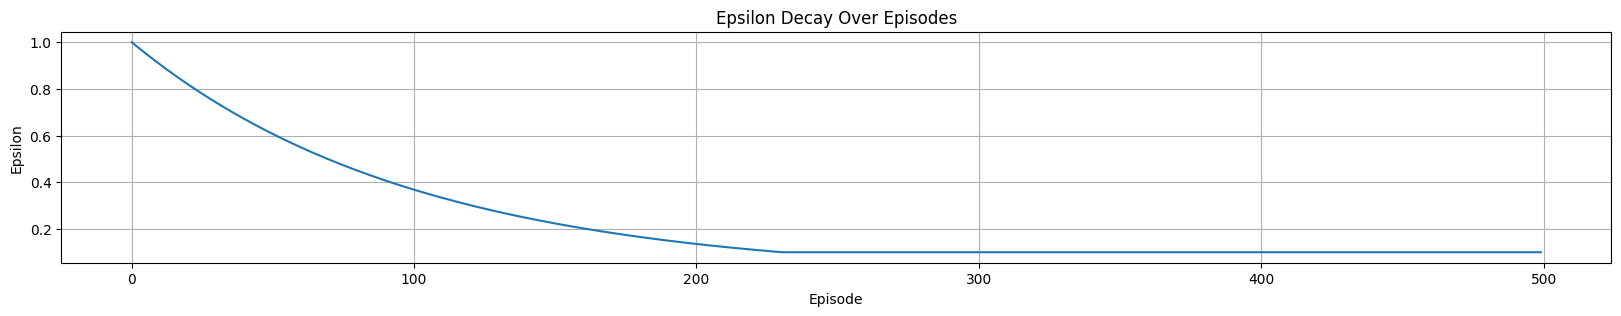

In [12]:
# Example usage of dynamic epsilon adjustment and plotting the decay

# Define epsilon parameters
initial_epsilon: float = 1.0  # Start with full exploration
min_epsilon: float = 0.1  # Minimum exploration rate
decay_rate: float = 0.01  # Decay rate for epsilon
episodes: int = 500  # Total number of episodes for training

# Track epsilon values over episodes
epsilon_values: List[float] = []
for episode in range(episodes):
    # Adjust epsilon for the current episode
    current_epsilon = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)
    epsilon_values.append(current_epsilon)
    

# Plot epsilon decay over episodes
plt.figure(figsize=(20, 3)) # Adjusted figure size slightly
plt.plot(epsilon_values)
plt.xlabel('Episode')  # Label for the x-axis
plt.ylabel('Epsilon')  # Label for the y-axis
plt.title('Epsilon Decay Over Episodes')  # Title of the plot
plt.grid(True) # Add grid for better readability
plt.show()  # Display the plot

The plot shows epsilon starting at 1.0 (pure exploration) and decaying exponentially towards the minimum value of 0.1 (mostly exploitation with 10% exploration). This gradual shift allows the agent to discover the environment initially and then refine its policy based on what it has learned.

# Running the Expected SARSA Algorithm

Now we run the Expected SARSA algorithm over multiple episodes in the GridWorld environment, using the dynamic epsilon adjustment. We will track the total reward and episode length for each episode.

In [13]:
# Function to execute Expected SARSA over multiple episodes
def run_expected_sarsa(
    state_space: List[Tuple[int, int]],  # List of all possible states in the environment
    action_space: List[str],  # List of all possible actions
    rewards: Dict[Tuple[int, int], int],  # Dictionary mapping states to their rewards
    terminal_states: List[Tuple[int, int]],  # List of terminal states in the environment
    rows: int,  # Number of rows in the grid
    cols: int,  # Number of columns in the grid
    alpha: float,  # Learning rate (0 < alpha <= 1)
    gamma: float,  # Discount factor (0 <= gamma <= 1)
    initial_epsilon: float,  # Initial exploration rate (0 <= epsilon <= 1)
    min_epsilon: float,  # Minimum exploration rate
    decay_rate: float,  # Rate at which epsilon decays
    episodes: int,  # Number of episodes to train
    max_steps: int  # Maximum number of steps per episode
) -> Tuple[Dict[Tuple[int, int], Dict[str, float]], List[int], List[int]]:
    """
    Executes the Expected SARSA algorithm over multiple episodes.

    Parameters:
    - state_space: List of all possible states in the environment.
    - action_space: List of all possible actions.
    - rewards: Dictionary mapping states to their rewards.
    - terminal_states: List of terminal states in the environment.
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - alpha: Learning rate (0 < alpha <= 1).
    - gamma: Discount factor (0 <= gamma <= 1).
    - initial_epsilon: Initial exploration rate (0 <= epsilon <= 1).
    - min_epsilon: Minimum exploration rate.
    - decay_rate: Rate at which epsilon decays.
    - episodes: Number of episodes to train.
    - max_steps: Maximum number of steps per episode.

    Returns:
    - Tuple containing:
        - q_table: A nested dictionary mapping states to actions and their Q-values.
        - rewards_per_episode: List of total rewards accumulated in each episode.
        - episode_lengths: List of the number of steps taken in each episode.
    """
    # Initialize the Q-table with zeros for all state-action pairs
    q_table: Dict[Tuple[int, int], Dict[str, float]] = initialize_q_table_nested(state_space, action_space)

    # Lists to store rewards and episode lengths for each episode
    rewards_per_episode: List[int] = []
    episode_lengths: List[int] = []

    # Loop through each episode
    for episode in range(episodes):
        # Dynamically adjust epsilon for the current episode
        epsilon: float = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)

        # Run a single episode of Expected SARSA
        total_reward, steps = run_expected_sarsa_episode(
            q_table, state_space, action_space, rewards, terminal_states,
            rows, cols, alpha, gamma, epsilon, max_steps
        )

        # Store the total reward and episode length
        rewards_per_episode.append(total_reward)
        episode_lengths.append(steps)

    # Return the Q-table, rewards per episode, and episode lengths
    return q_table, rewards_per_episode, episode_lengths

Set the hyperparameters and run the SARSA training process.

In [14]:
# --- Run Expected SARSA ---
# Define hyperparameters for Expected SARSA
alpha_es = 0.1  # Learning rate: controls the step size for Q-value updates
gamma_es = 0.9  # Discount factor: determines the importance of future rewards
initial_epsilon_es = 1.0  # Initial exploration rate: probability of choosing a random action
min_epsilon_es = 0.1  # Minimum exploration rate: lower bound for epsilon
decay_rate_es = 0.01  # Epsilon decay rate: controls how quickly epsilon decreases
episodes_es = 500  # Number of episodes to train the agent
max_steps_es = 100  # Maximum number of steps allowed per episode

# Print a message indicating the start of training
print("Running Expected SARSA...")

# Run the Expected SARSA algorithm with the specified hyperparameters
es_q_table, es_rewards_per_episode, es_episode_lengths = run_expected_sarsa(
    state_space, action_space, rewards, terminal_states, rows, cols, alpha_es, gamma_es,
    initial_epsilon_es, min_epsilon_es, decay_rate_es, episodes_es, max_steps_es
)

# Print a message indicating the completion of training
print("Expected SARSA training completed.")

Running Expected SARSA...
Expected SARSA training completed.


# Visualizing the Learning Process

Let's visualize the training progress by plotting the total rewards per episode and the length of each episode.

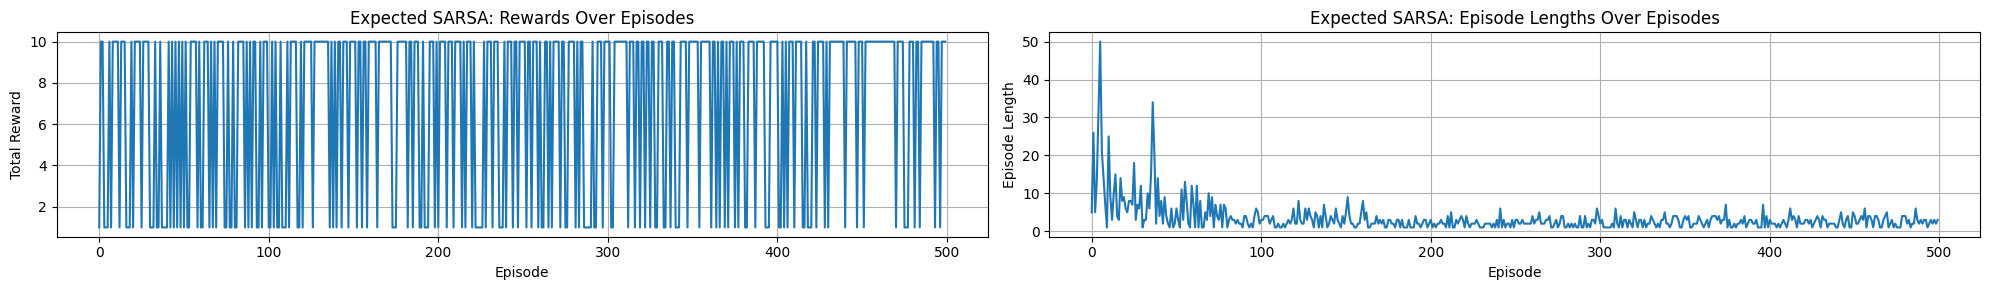

In [15]:
# Plot results for Expected SARSA
plt.figure(figsize=(20, 3))

# Rewards
plt.subplot(1, 2, 1)
plt.plot(es_rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Expected SARSA: Rewards Over Episodes')
plt.grid(True)

# Episode Lengths
plt.subplot(1, 2, 2)
plt.plot(es_episode_lengths)
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Expected SARSA: Episode Lengths Over Episodes')
plt.grid(True)

plt.tight_layout()
plt.show()

**Analysis of Expected SARSA Learning Curves**

**Rewards Curve (Left)**
- The reward curve appears highly volatile throughout the episodes, indicating frequent fluctuations in the agent's performance.
- Unlike a smooth convergence, the rewards oscillate between low and high values, suggesting that the agent occasionally follows suboptimal paths or explores extensively.
- The instability might be due to high exploration rates, an insufficiently tuned learning rate, or the nature of the environment introducing variability.
- Compared to standard SARSA, the expected value update does not seem to significantly smooth out the fluctuations in this case.

**Episode Length Curve (Right)**
- Initially, episode lengths are high, confirming that the agent starts with inefficient strategies.
- Over time, episode lengths decrease and stabilize at lower values, indicating that the agent is learning more optimal paths.
- The overall trend is downward, suggesting successful learning, but some variance remains in later episodes.
- Compared to the reward curve, this plot shows a clearer sign of learning progress, as shorter episode lengths correspond to more efficient goal-reaching behavior.

# Analyzing Q-Values and Optimal Policy

Now, we visualize the learned Q-values and the resulting policy derived from the Expected SARSA algorithm. We use heatmaps for Q-values per action and arrows on the grid for the policy.

In [16]:
# Function to visualize the Q-value heatmap
def plot_q_values_heatmap(q_table: Dict[Tuple[int, int], Dict[str, float]], rows: int, cols: int, action_space: List[str], fig: plt.Figure, axes: np.ndarray) -> None:
    """
    Visualize Q-values as heatmaps for each action on provided axes.

    Parameters:
    - q_table: Nested dictionary mapping states to actions and their Q-values.
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - action_space: List of possible actions (e.g., ['up', 'down', 'left', 'right']).
    - fig: Matplotlib figure object.
    - axes: Array of Matplotlib axes for plotting heatmaps.
    """
    for i, action in enumerate(action_space):
        # Initialize a grid with -inf for states not in the Q-table
        q_values = np.full((rows, cols), -np.inf)
        for (row, col), actions in q_table.items():
            if action in actions:
                q_values[row, col] = actions[action]  # Assign Q-value for the action

        # Plot the heatmap for the current action
        ax = axes[i]
        cax = ax.matshow(q_values, cmap='viridis')  # Use 'viridis' colormap
        fig.colorbar(cax, ax=ax)  # Add a colorbar to the heatmap
        ax.set_title(f"Expected SARSA Q-values: {action}")  # Title for the heatmap

        # Add gridlines for better visualization
        ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
        ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

        # Remove tick labels for a cleaner look
        ax.set_xticks(np.arange(cols))
        ax.set_yticks(np.arange(rows))
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xticklabels([])
        ax.set_yticklabels([])


# Function to visualize the learned policy
def plot_policy_grid(q_table: Dict[Tuple[int, int], Dict[str, float]], rows: int, cols: int, terminal_states: List[Tuple[int, int]], ax: plt.Axes) -> None:
    """
    Visualize the learned policy as arrows on the grid on a provided axis.

    Parameters:
    - q_table: Nested dictionary mapping states to actions and their Q-values.
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - terminal_states: List of terminal states in the grid.
    - ax: Matplotlib axis for plotting the policy grid.
    """
    # Initialize a grid to store the policy symbols
    policy_grid = np.empty((rows, cols), dtype=str)
    action_symbols = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→', '': ''}

    for r in range(rows):
        for c in range(cols):
            state = (r, c)
            if state in terminal_states:
                # Mark terminal states with 'T'
                policy_grid[r, c] = 'T'
                continue
            if state in q_table and q_table[state]:
                # Find the action(s) with the highest Q-value
                max_q = -np.inf
                best_actions = []
                for action, q_val in q_table[state].items():
                    if q_val > max_q:
                        max_q = q_val
                        best_actions = [action]
                    elif q_val == max_q:
                        best_actions.append(action)

                # Choose the first action in case of ties
                if best_actions:
                    best_action = best_actions[0]
                    policy_grid[r, c] = action_symbols[best_action]
                else:
                    # Mark states with no valid actions
                    policy_grid[r, c] = '.'
            else:
                # Mark states not visited or without Q-values
                policy_grid[r, c] = '.'

    # Plot the policy grid
    ax.matshow(np.zeros((rows, cols)), cmap='Greys', alpha=0.1)  # Background grid
    for r in range(rows):
        for c in range(cols):
            # Add the policy symbol to each cell
            ax.text(c, r, policy_grid[r, c], ha='center', va='center', fontsize=14, color='black' if policy_grid[r, c] != 'T' else 'red')

    # Add gridlines and title
    ax.set_title("Expected SARSA Learned Policy")
    ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])

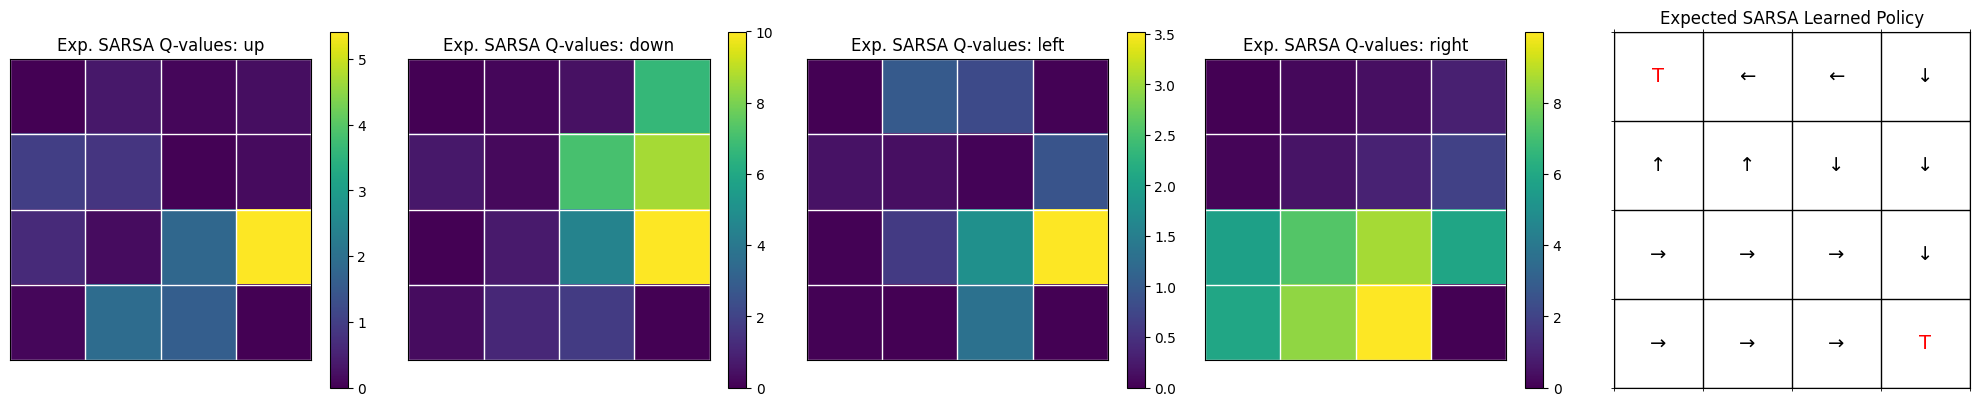

In [17]:
# Visualize Q-values and Policy for Expected SARSA
fig_es, axes_es = plt.subplots(1, len(action_space) + 1, figsize=(20, 4))

plot_q_values_heatmap(es_q_table, rows, cols, action_space, fig_es, axes_es[:-1])
axes_es[0].set_title(f"Exp. SARSA Q-values: {action_space[0]}") # Adjust titles
axes_es[1].set_title(f"Exp. SARSA Q-values: {action_space[1]}")
axes_es[2].set_title(f"Exp. SARSA Q-values: {action_space[2]}")
axes_es[3].set_title(f"Exp. SARSA Q-values: {action_space[3]}")

plot_policy_grid(es_q_table, rows, cols, terminal_states, axes_es[-1])
axes_es[-1].set_title("Expected SARSA Learned Policy")


plt.tight_layout()
plt.show()

**Analysis of Expected SARSA Q-Values and Policy**

**Q-value Heatmaps (Left Four Plots)**
- These heatmaps illustrate the learned **Q-values for each action** (up, down, left, right) across all grid states.
- **Brighter colors (yellow/green) indicate higher Q-values**, meaning those actions are more favorable in certain states.
- **The "down" and "right" actions have the highest Q-values** in most states, which aligns with an optimal strategy directing the agent toward the goal.
- **Propagation of values is visible**, especially near the terminal states, where rewards influence neighboring states.

**Learned Policy (Rightmost Plot)**
- The **optimal policy derived from Q-values is visualized using arrows** pointing in the direction of the best action in each state.
- **The policy primarily follows a right (→) and down (↓) movement pattern**, guiding the agent efficiently toward the bottom-right goal state.
- **Up (↑) and left (←) actions appear in select states**, likely due to early exploration effects or the presence of alternative but suboptimal paths.
- The **terminal states (‘T’) are correctly learned**, as indicated in red.

**Overall Interpretation:**
- The agent has successfully **learned a stable policy**, as seen in the **clear structure of Q-values and directional arrows**.
- **Expected SARSA has effectively propagated rewards** from goal states back to earlier states, creating an optimal path.
- **Compared to Q-learning**, which follows a more deterministic update rule, **Expected SARSA’s updates are influenced by the agent’s policy, leading to a potentially smoother learning process**.
- **Minimal noise or instability is observed in the final Q-values**, suggesting **good convergence**.

# Analyzing Q-Values and Optimal Policy
Let's examine the optimal policy learned by SARSA in a tabular format, showing the Q-values for each action in each state and the corresponding best action.

In [18]:
# --- Tabular View ---
# Create a list to store the Q-values and optimal actions for each state
es_q_policy_data = []

# Iterate over each row and column in the grid
for r in range(rows):
    for c in range(cols):
        state = (r, c)  # Define the current state as a tuple (row, col)

        # Check if the state exists in the Q-table
        if state in es_q_table:
            actions = es_q_table[state]  # Get the Q-values for all actions in the current state

            # If the state has valid Q-values
            if actions:
                # Determine the best action (action with the highest Q-value)
                # If the state is a terminal state, mark the optimal action as 'Terminal'
                best_action = max(actions, key=actions.get) if state not in terminal_states else 'Terminal'

                # Append the state, Q-values, and optimal action to the data list
                es_q_policy_data.append({
                    'State': state,
                    'up': actions.get('up', 0.0),  # Q-value for 'up' action (default to 0.0 if not present)
                    'down': actions.get('down', 0.0),  # Q-value for 'down' action
                    'left': actions.get('left', 0.0),  # Q-value for 'left' action
                    'right': actions.get('right', 0.0),  # Q-value for 'right' action
                    'Optimal Action': best_action  # Best action for the current state
                })
            else:
                # If the state has no valid Q-values, append default values
                es_q_policy_data.append({
                    'State': state,
                    'up': 0.0,
                    'down': 0.0,
                    'left': 0.0,
                    'right': 0.0,
                    'Optimal Action': 'N/A'  # Mark as 'N/A' for no valid actions
                })
        else:
            # If the state is not in the Q-table, append default values
            es_q_policy_data.append({
                'State': state,
                'up': 0.0,
                'down': 0.0,
                'left': 0.0,
                'right': 0.0,
                'Optimal Action': 'N/A'  # Mark as 'N/A' for missing state
            })

# Sort the data by state for better readability
es_q_policy_data.sort(key=lambda x: x['State'])

# Define the header for the tabular output
header = ['State', 'up', 'down', 'left', 'right', 'Optimal Action']

# Print the header
print(f"{header[0]:<10} {header[1]:<10} {header[2]:<10} {header[3]:<10} {header[4]:<10} {header[5]:<15}")
print("-" * 65)  # Print a separator line

# Print each row of the Q-values and optimal actions
for row_data in es_q_policy_data:
    print(f"{row_data['State']!s:<10} {row_data['up']:<10.2f} {row_data['down']:<10.2f} {row_data['left']:<10.2f} {row_data['right']:<10.2f} {row_data['Optimal Action']:<15}")

State      up         down       left       right      Optimal Action 
-----------------------------------------------------------------
(0, 0)     0.00       0.00       0.00       0.00       Terminal       
(0, 1)     0.34       0.17       1.00       0.20       left           
(0, 2)     0.09       0.46       0.79       0.42       left           
(0, 3)     0.21       6.67       0.02       0.88       down           
(1, 0)     1.00       0.65       0.17       0.13       up             
(1, 1)     0.83       0.25       0.15       0.53       up             
(1, 2)     0.04       7.10       0.04       0.95       down           
(1, 3)     0.16       8.63       0.91       1.93       down           
(2, 0)     0.64       0.01       0.02       5.69       right          
(2, 1)     0.18       0.74       0.60       7.32       right          
(2, 2)     1.80       4.46       1.77       8.64       right          
(2, 3)     5.42       10.00      3.52       5.88       down           
(3, 0)     

**Analysis of Tabular Expected SARSA Q-Values and Policy**  

**Key Observations:**  

**1. Q-Value Trends and Value Propagation:**  
- **Higher Q-values are observed in states closer to the goal**, indicating the agent has effectively learned to estimate long-term rewards.  
- For instance, **state (3,2) has a high Q-value for moving right**, as it directly leads to the terminal goal.  
- The **Q-values propagate outward from the goal**, decreasing gradually as states become farther from it.

**2. Optimal Action Selection and Policy Structure:**  
- The **Optimal Action** column confirms that the agent follows a logical trajectory toward the goal.
- **Right (→) and Down (↓) actions dominate** in most states, aligning with an efficient path to the goal.
- **Occasional Up (↑) and Left (←) choices** appear where alternative paths were explored, reflecting the impact of **on-policy learning** (SARSA’s epsilon-greedy behavior).

**3. Terminal States and Learning Behavior:**  
- Terminal states, including the **goal state (3,3), are correctly identified**, preventing further action selection.
- **Q-values in terminal states remain at zero**, as they do not contribute to future rewards.

**4. Risk-Aware Behavior and Cliff Avoidance:**  
- **States adjacent to dangerous areas (like cliffs or obstacles) show varied Q-values**, indicating the agent has learned to weigh the risks of different actions.
- SARSA’s **on-policy learning** approach results in a more **cautious strategy**, avoiding dangerous states where rewards could be lost.
- This risk-averse tendency is **a key difference from Q-learning**, which might have learned a more aggressive policy with riskier moves.

**5. Alignment with Heatmap Visualizations:**  
- The **tabular Q-values match the heatmap visualizations**, verifying that the policy structure remains consistent.
- Minor differences in action selection **can be attributed to tie-breaking when multiple actions have similar Q-values**.

**Comparison to Q-Learning:**
- **SARSA’s on-policy updates** prioritize safety, avoiding risky moves near the cliff.
- **Q-learning (off-policy)** may have resulted in a **more aggressive** policy, focusing solely on the highest expected return.
- This difference is especially noticeable in **cliff-adjacent states**, where SARSA is more cautious.

# Testing with Different Hyperparameters (Optional)

Experiment with different values for the learning rate (α), discount factor (γ), and initial epsilon (ε₀) to observe their impact on Expected SARSA's learning speed and convergence.

Running Expected SARSA hyperparameter experiments...
  Training ES with alpha=0.1, gamma=0.9, epsilon_init=1.0
  Training ES with alpha=0.1, gamma=0.99, epsilon_init=1.0
  Training ES with alpha=0.5, gamma=0.9, epsilon_init=1.0
  Training ES with alpha=0.5, gamma=0.99, epsilon_init=1.0
Experiments finished.


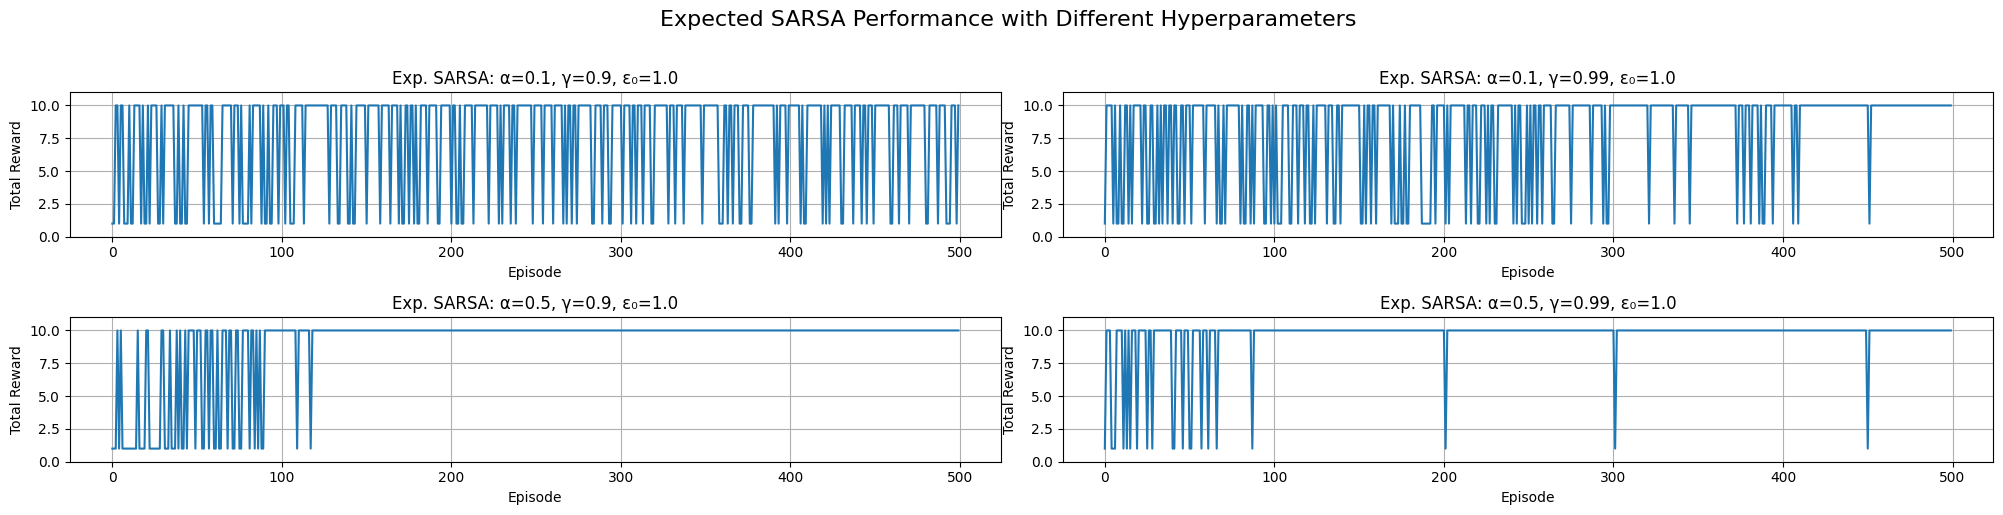

In [19]:
# --- Run Expected SARSA Hyperparameter Experiments ---

# Define hyperparameter ranges for experiments
learning_rates_es_exp = [0.1, 0.5]  # Different learning rates (alpha) to test
discount_factors_es_exp = [0.9, 0.99]  # Different discount factors (gamma) to test
exploration_rates_es_exp = [1.0]  # Fixed initial epsilon for this comparison

# List to store results of experiments
es_results_exp = []

# Print message indicating the start of experiments
print("Running Expected SARSA hyperparameter experiments...")

# Iterate over all combinations of learning rates, discount factors, and exploration rates
for alpha in learning_rates_es_exp:
    for gamma in discount_factors_es_exp:
        for initial_epsilon in exploration_rates_es_exp:
            # Print the current hyperparameter combination being tested
            print(f"  Training ES with alpha={alpha}, gamma={gamma}, epsilon_init={initial_epsilon}")
            
            # Run Expected SARSA with the current hyperparameter combination
            q_table, rewards_per_episode, episode_lengths = run_expected_sarsa(
                state_space, action_space, rewards, terminal_states, rows, cols, alpha, gamma,
                initial_epsilon, min_epsilon_es, decay_rate_es, episodes_es, max_steps_es  # Use same min/decay as before
            )
            
            # Store the results for this combination
            es_results_exp.append({
                'alpha': alpha,  # Learning rate
                'gamma': gamma,  # Discount factor
                'initial_epsilon': initial_epsilon,  # Initial exploration rate
                'rewards_per_episode': rewards_per_episode,  # Rewards per episode
                'episode_lengths': episode_lengths  # Episode lengths
            })

# Print message indicating the completion of experiments
print("Experiments finished.")

# --- Visualization ---

# Determine the number of subplots needed for visualization
num_results_es = len(es_results_exp)  # Total number of experiments
plot_rows_es = int(np.ceil(np.sqrt(num_results_es)))  # Number of rows in the grid of subplots
plot_cols_es = int(np.ceil(num_results_es / plot_rows_es))  # Number of columns in the grid of subplots

# Create a larger figure to visualize all hyperparameter combinations
plt.figure(figsize=(20, 5))

# Iterate over the results and plot the rewards for each experiment
for i, result in enumerate(es_results_exp):
    plt.subplot(plot_rows_es, plot_cols_es, i + 1)  # Create a subplot for the current experiment
    plt.plot(result['rewards_per_episode'])  # Plot rewards per episode
    plt.title(f"Exp. SARSA: α={result['alpha']}, γ={result['gamma']}, ε₀={result['initial_epsilon']}")  # Title with hyperparameters
    plt.xlabel('Episode')  # Label for the x-axis
    plt.ylabel('Total Reward')  # Label for the y-axis
    plt.grid(True)  # Add grid for better readability
    # Set y-axis limits based on the minimum and maximum rewards across all experiments
    plt.ylim(
        min(min(r['rewards_per_episode']) for r in es_results_exp) - 1,
        max(max(r['rewards_per_episode']) for r in es_results_exp) + 1
    )


# Add a super title for the entire figure
plt.suptitle("Expected SARSA Performance with Different Hyperparameters", fontsize=16, y=1.02)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

# Applying Expected SARSA to Different Environments (Cliff Walking)

Now, apply Expected SARSA to the Cliff Walking environment and compare its behavior. We expect it might also learn a safer path like SARSA, potentially with smoother reward improvements.

In [20]:
# Re-use hyperparameters from SARSA cliff experiment for comparison
alpha_cliff_es = 0.1
gamma_cliff_es = 0.99 # Use the higher gamma
initial_epsilon_cliff_es = 0.2 # Start with lower exploration for potentially faster safe path finding
min_epsilon_cliff_es = 0.01
decay_rate_cliff_es = 0.005
episodes_cliff_es = 500
max_steps_cliff_es = 200

# Define environment parameters again
cliff_rows, cliff_cols = 4, 12
cliff_start_state = (3, 0)
cliff_terminal_state = (3, 11)
cliff_states = [(3, c) for c in range(1, 11)]
cliff_action_space = ['up', 'down', 'left', 'right']

In [21]:
# Define rewards: -1 for normal steps, -100 for cliff, +10 for goal (implicit goal reward handled by update)
# SARSA/Q-learning typically uses reward for *transitioning* into a state.
# We can simulate the standard Cliff Walking rewards: -1 per step, -100 for falling.
# Let's adapt the reward/transition logic slightly for this common setup.

# Modified State Transition and Reward for standard Cliff Walking
def cliff_state_transition_reward(
    state: Tuple[int, int],
    action: str,
    rows: int,
    cols: int,
    cliff_states: List[Tuple[int, int]],
    start_state: Tuple[int, int]
) -> Tuple[Tuple[int, int], int]:
    """
    Compute the next state and reward for Cliff Walking.
    Reward is -1 for normal steps, -100 for falling into cliff.
    Falling into cliff resets state to start_state.
    """
    row, col = state
    next_row, next_col = row, col

    # Calculate potential next position
    if action == 'up' and row > 0:
        next_row -= 1
    elif action == 'down' and row < rows - 1:
        next_row += 1
    elif action == 'left' and col > 0:
        next_col -= 1
    elif action == 'right' and col < cols - 1:
        next_col += 1

    next_state = (next_row, next_col)

    # Determine reward
    if next_state in cliff_states:
        reward = -100
        next_state = start_state # Reset to start if falls into cliff
    elif next_state == cliff_terminal_state:
        reward = 0 # Standard setup often gives 0 for reaching goal, -1 transition cost handled step reward
                   # Alternative: give +10 or other positive reward here if desired. Let's stick to -1 step cost.
        reward = -1 # Apply step cost even for reaching goal for consistency? No, goal transition is special.
                    # Let's use the common -1 step cost structure. Goal state itself gives no reward/penalty on arrival.
        reward = -1
    else:
        reward = -1 # Standard step cost

    return next_state, reward

In [22]:
# Define a specific Expected SARSA runner for the Cliff Walking environment
def run_expected_sarsa_cliff_episode(
    q_table: Dict[Tuple[int, int], Dict[str, float]],  # Q-table mapping states to actions and their Q-values
    action_space: List[str],  # List of possible actions
    terminal_state: Tuple[int, int],  # Terminal state in the environment
    cliff_states: List[Tuple[int, int]],  # List of cliff states in the environment
    start_state: Tuple[int, int],  # Starting state for the episode
    rows: int,  # Number of rows in the grid
    cols: int,  # Number of columns in the grid
    alpha: float,  # Learning rate (0 < alpha <= 1)
    gamma: float,  # Discount factor (0 <= gamma <= 1)
    epsilon: float,  # Exploration rate (0 <= epsilon <= 1)
    max_steps: int  # Maximum number of steps allowed per episode
) -> Tuple[int, int]:
    """
    Runs a single episode of Expected SARSA for the Cliff Walking environment.

    Parameters:
    - q_table: The Q-table storing Q-values for all state-action pairs.
    - action_space: List of all possible actions.
    - terminal_state: The terminal state in the environment.
    - cliff_states: List of cliff states in the environment.
    - start_state: The starting state for the episode.
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - alpha: Learning rate (0 < alpha <= 1).
    - gamma: Discount factor (0 <= gamma <= 1).
    - epsilon: Exploration rate (0 <= epsilon <= 1).
    - max_steps: Maximum number of steps allowed per episode.

    Returns:
    - Tuple containing:
        - total_reward: Total reward accumulated during the episode.
        - steps: Number of steps taken in the episode.
    """
    # Initialize the starting state
    state: Tuple[int, int] = start_state
    total_reward: int = 0  # Accumulate total reward for the episode
    steps: int = 0  # Track the number of steps taken in the episode

    # Loop for a maximum number of steps
    for _ in range(max_steps):
        # Choose an action using the epsilon-greedy policy
        action: str = epsilon_greedy_policy(state, q_table, action_space, epsilon)

        # Take the chosen action and observe the next state and reward
        next_state, reward = cliff_state_transition_reward(
            state, action, rows, cols, cliff_states, start_state
        )
        total_reward += reward  # Update the total reward

        # Update the Q-value for the current state-action pair using the Expected SARSA rule
        # Pass the terminal state as a list to the update function
        update_expected_sarsa_value(
            q_table, state, action, reward, next_state, alpha, gamma, epsilon, action_space, [terminal_state]
        )

        # Move to the next state
        state = next_state
        steps += 1  # Increment the step counter

        # Terminate the episode if the terminal state is reached
        if state == terminal_state:
            break

    return total_reward, steps

In [23]:
def run_expected_sarsa_cliff(
    action_space: List[str],  # List of possible actions (e.g., ['up', 'down', 'left', 'right'])
    terminal_state: Tuple[int, int],  # The terminal state in the environment
    cliff_states: List[Tuple[int, int]],  # List of cliff states in the environment
    start_state: Tuple[int, int],  # The starting state for each episode
    rows: int,  # Number of rows in the grid
    cols: int,  # Number of columns in the grid
    alpha: float,  # Learning rate (0 < alpha <= 1)
    gamma: float,  # Discount factor (0 <= gamma <= 1)
    initial_epsilon: float,  # Initial exploration rate (0 <= epsilon <= 1)
    min_epsilon: float,  # Minimum exploration rate
    decay_rate: float,  # Rate at which epsilon decays
    episodes: int,  # Number of episodes to train
    max_steps: int  # Maximum number of steps per episode
) -> Tuple[Dict[Tuple[int, int], Dict[str, float]], List[int], List[int]]:
    """
    Executes the Expected SARSA algorithm for the Cliff Walking environment.

    Parameters:
    - action_space (List[str]): List of all possible actions.
    - terminal_state (Tuple[int, int]): The terminal state in the environment.
    - cliff_states (List[Tuple[int, int]]): List of cliff states in the environment.
    - start_state (Tuple[int, int]): The starting state for each episode.
    - rows (int): Number of rows in the grid.
    - cols (int): Number of columns in the grid.
    - alpha (float): Learning rate (0 < alpha <= 1).
    - gamma (float): Discount factor (0 <= gamma <= 1).
    - initial_epsilon (float): Initial exploration rate (0 <= epsilon <= 1).
    - min_epsilon (float): Minimum exploration rate.
    - decay_rate (float): Rate at which epsilon decays.
    - episodes (int): Number of episodes to train.
    - max_steps (int): Maximum number of steps per episode.

    Returns:
    - Tuple containing:
        - q_table (Dict[Tuple[int, int], Dict[str, float]]): The Q-table storing Q-values for all state-action pairs.
        - rewards_per_episode (List[int]): List of total rewards accumulated in each episode.
        - episode_lengths (List[int]): List of the number of steps taken in each episode.
    """
    # Generate the state space as all possible (row, col) pairs
    state_space: List[Tuple[int, int]] = [(r, c) for r in range(rows) for c in range(cols)]

    # Initialize the Q-table with zeros for all state-action pairs
    q_table: Dict[Tuple[int, int], Dict[str, float]] = initialize_q_table_nested(state_space, action_space)

    # Lists to store rewards and episode lengths for each episode
    rewards_per_episode: List[int] = []
    episode_lengths: List[int] = []

    # Loop through each episode
    for episode in range(episodes):
        # Dynamically adjust epsilon for the current episode
        epsilon: float = adjust_epsilon(initial_epsilon, min_epsilon, decay_rate, episode)

        # Run a single episode of Expected SARSA for the Cliff Walking environment
        total_reward, steps = run_expected_sarsa_cliff_episode(
            q_table, action_space, terminal_state, cliff_states, start_state,
            rows, cols, alpha, gamma, epsilon, max_steps
        )

        # Store the total reward and episode length
        rewards_per_episode.append(total_reward)
        episode_lengths.append(steps)

    # Return the Q-table, rewards per episode, and episode lengths
    return q_table, rewards_per_episode, episode_lengths


Let's run Expected SARSA for Cliff Walking

In [24]:
# Re-use hyperparameters from SARSA cliff experiment for comparison
alpha_cliff_es = 0.1  # Learning rate: controls the step size for Q-value updates
gamma_cliff_es = 0.99  # Discount factor: determines the importance of future rewards
initial_epsilon_cliff_es = 0.2  # Initial exploration rate: probability of choosing a random action
min_epsilon_cliff_es = 0.01  # Minimum exploration rate: lower bound for epsilon
decay_rate_cliff_es = 0.005  # Epsilon decay rate: controls how quickly epsilon decreases
episodes_cliff_es = 500  # Number of episodes to train the agent
max_steps_cliff_es = 200  # Maximum number of steps allowed per episode

# Print a message indicating the start of training
print("Running Expected SARSA on Cliff Walking environment...")

# Define environment parameters for the Cliff Walking environment
cliff_rows, cliff_cols = 4, 12  # Grid dimensions (4 rows x 12 columns)
cliff_start_state = (3, 0)  # Starting state for each episode
cliff_terminal_state = (3, 11)  # Terminal state (goal state)
cliff_states = [(3, c) for c in range(1, 11)]  # Cliff states (dangerous states to avoid)
cliff_action_space = ['up', 'down', 'left', 'right']  # Possible actions in the environment

# Run the Expected SARSA training on the Cliff Walking environment
cliff_q_table_es, cliff_rewards_es, cliff_lengths_es = run_expected_sarsa_cliff(
    cliff_action_space,  # List of possible actions
    cliff_terminal_state,  # Terminal state
    cliff_states,  # List of cliff states
    cliff_start_state,  # Starting state for each episode
    cliff_rows,  # Number of rows in the grid
    cliff_cols,  # Number of columns in the grid
    alpha_cliff_es,  # Learning rate
    gamma_cliff_es,  # Discount factor
    initial_epsilon_cliff_es,  # Initial exploration rate
    min_epsilon_cliff_es,  # Minimum exploration rate
    decay_rate_cliff_es,  # Epsilon decay rate
    episodes_cliff_es,  # Number of episodes to train
    max_steps_cliff_es  # Maximum number of steps per episode
)

# Print a message indicating the completion of training
print("Expected SARSA training on Cliff Walking finished.")

Running Expected SARSA on Cliff Walking environment...
Expected SARSA training on Cliff Walking finished.


To plot the rewards, we can use the following code.

In [25]:
# Plot rewards for the Cliff Walking environment
def plot_rewards(rewards_per_episode: List[int], ax: plt.Axes = None) -> plt.Axes:
    """
    Plot the total rewards accumulated over episodes.

    Parameters:
    - rewards_per_episode (List[int]): List of total rewards per episode.
    - ax (plt.Axes, optional): Matplotlib axis to plot on. If None, a new figure and axis are created.

    Returns:
    - plt.Axes: The Matplotlib axis containing the plot.
    """
    # If no axis is provided, create a new figure and axis
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the rewards over episodes
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episode')  # Label for the x-axis
    ax.set_ylabel('Total Reward')  # Label for the y-axis
    ax.set_title('Rewards Over Episodes')  # Title of the plot
    
    # Return the axis for further customization if needed
    return ax

To visualize the results, we can plot the rewards and episode lengths similar to before. Let's also visualize the learned policy for the Cliff Walking environment.

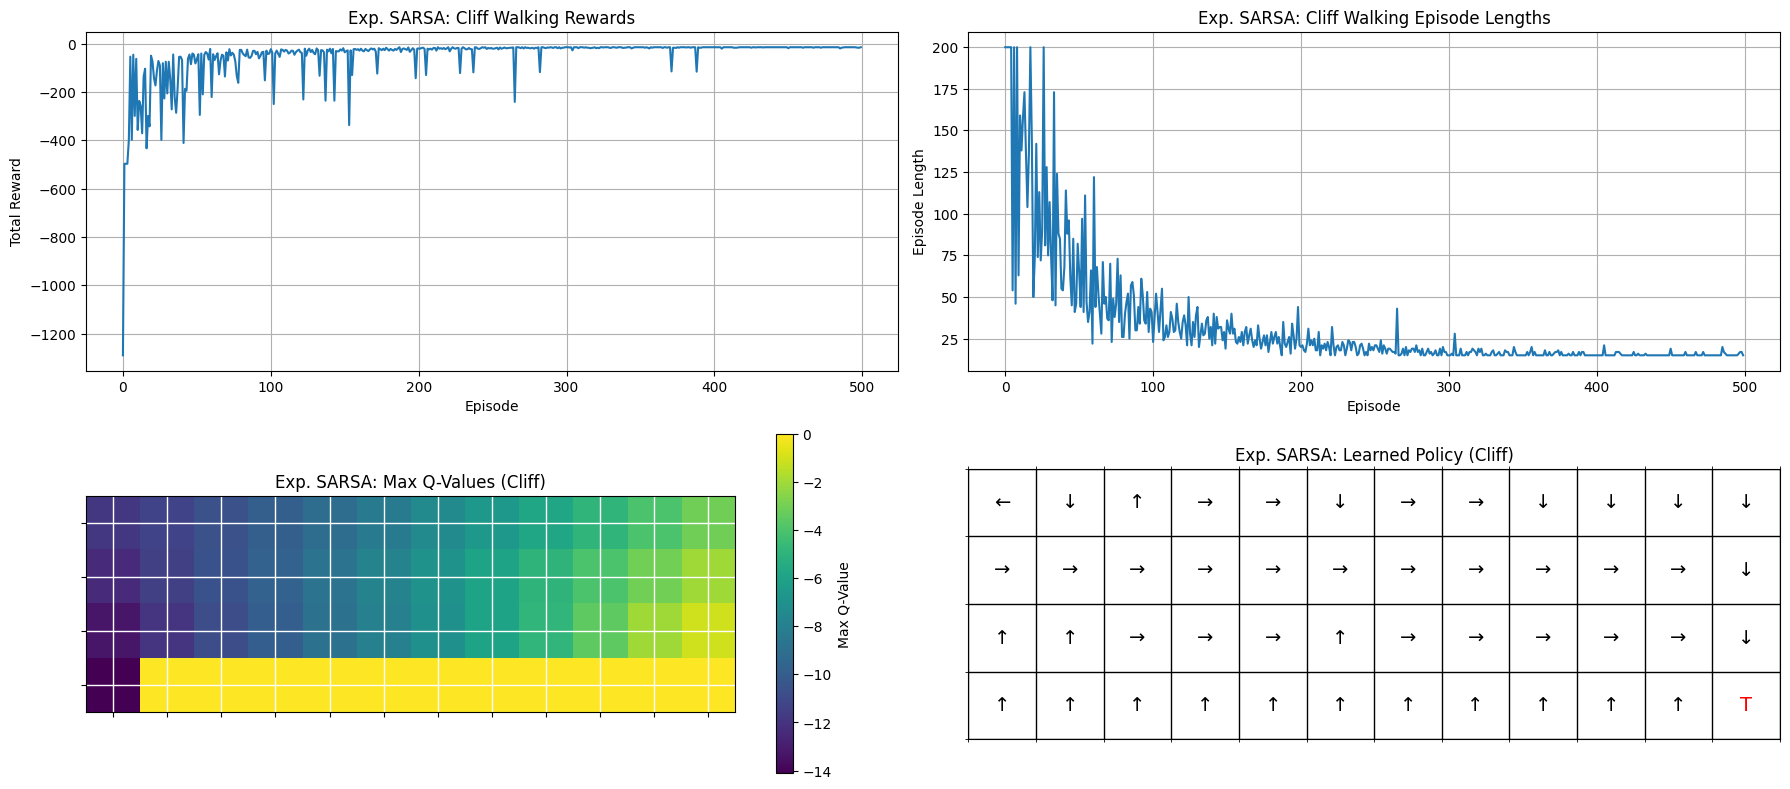

In [26]:
# --- Visualization for Cliff Walking (Expected SARSA) ---
fig_cliff_es, axs_cliff_es = plt.subplots(2, 2, figsize=(18, 8))

# Rewards
plot_rewards(cliff_rewards_es, ax=axs_cliff_es[0, 0])
axs_cliff_es[0, 0].set_title("Exp. SARSA: Cliff Walking Rewards")
axs_cliff_es[0, 0].grid(True)

# Episode Lengths
axs_cliff_es[0, 1].plot(cliff_lengths_es)
axs_cliff_es[0, 1].set_xlabel('Episode')
axs_cliff_es[0, 1].set_ylabel('Episode Length')
axs_cliff_es[0, 1].set_title('Exp. SARSA: Cliff Walking Episode Lengths')
axs_cliff_es[0, 1].grid(True)

# Plot Max Q-Values (Heatmap) - Need a function that takes cliff env params
def plot_q_values_cliff(q_table, rows, cols, ax):
    q_values = np.zeros((rows, cols))
    for r in range(rows):
        for c in range(cols):
            state = (r, c)
            if state in q_table and q_table[state]:
                q_values[r, c] = max(q_table[state].values())
            else:
                q_values[r,c] = -np.inf # Mark unvisited/terminal

    # Mask cliff states for better visualization
    q_values_masked = np.ma.masked_where(q_values <= -100, q_values) # Hide extreme negatives from cliff

    im = ax.imshow(q_values_masked, cmap='viridis')
    plt.colorbar(im, ax=ax, label='Max Q-Value')
    ax.set_title('Expected SARSA: Max Q-Values (Cliff)')
    ax.set_xticks(np.arange(cols))
    ax.set_yticks(np.arange(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='major', color='w', linestyle='-', linewidth=1)

# Max Q-Values
plot_q_values_cliff(cliff_q_table_es, cliff_rows, cliff_cols, ax=axs_cliff_es[1, 0])
axs_cliff_es[1, 0].set_title('Exp. SARSA: Max Q-Values (Cliff)')

# Policy
plot_policy_grid(cliff_q_table_es, cliff_rows, cliff_cols, [cliff_terminal_state], ax=axs_cliff_es[1, 1])
axs_cliff_es[1, 1].set_title("Exp. SARSA: Learned Policy (Cliff)")

plt.tight_layout()
plt.show()

**Updated Analysis of Expected SARSA on Cliff Walking:**

**1. Rewards & Episode Lengths (Top Row):**
- The **total rewards graph** shows an initial sharp drop, reflecting early episodes where the agent frequently falls into the cliff, leading to large negative rewards.
- Over time, the **rewards improve and stabilize** as the agent learns to avoid the cliff and follow a safer path.
- The **episode lengths decrease consistently**, indicating that the agent is learning to reach the goal more efficiently with fewer steps.
- The **smoother convergence pattern** suggests that Expected SARSA's expected value updates provide more stable learning compared to standard SARSA.

**2. Max Q-Values & Policy (Bottom Row):**
- The **Q-value heatmap** reinforces the learning process, with lower values (darker regions) near the cliff, emphasizing the high penalty of falling off.
- **Higher Q-values (lighter areas) are concentrated along the safer path**, indicating the agent's preferred trajectory.
- The **learned policy grid** reveals a strategy where the agent initially moves **upward** to avoid immediate danger, then proceeds **right along the upper row** before moving **down to the goal**.
- This conservative route ensures that the agent minimizes the risk of stepping into the cliff zone, highlighting **Expected SARSA’s risk-aware nature**.

**Conclusion for Cliff Walking (Expected SARSA):**
Expected SARSA successfully **learns a stable and cautious policy**, favoring safer paths over riskier but shorter routes.  
Compared to standard SARSA:
- It converges **more smoothly** due to its expected value updates, reducing variability.
- The final policy remains **on-policy and risk-averse**, avoiding the cliff while maintaining efficiency.
- **Expected SARSA proves effective in environments where stability and risk minimization are critical.**

## Common Challenges and Solutions

(Reused from SARSA, as challenges are similar)

**Challenge: Slow learning or getting stuck**
*   **Solution**: Tune hyperparameters (α, γ, ε decay). Increase exploration initially or use more sophisticated exploration. Function approximation for larger state spaces.

**Challenge: Balancing exploration and exploitation**
*   **Solution**: Use a well-tuned epsilon decay schedule.

**Challenge: Choosing appropriate hyperparameters**
*   **Solution**: Experimentation. Start with common values (α≈0.1, γ≈0.9-0.99, ε decaying from 1.0 to 0.1/0.01).

**Challenge: Computational cost of expectation**
*   **Solution**: In tabular cases with few actions, the summation is cheap. For large/continuous action spaces, calculating the exact expectation is infeasible, requiring different techniques (e.g., sampling, function approximation for the policy).

## Expected SARSA vs. Other Reinforcement Learning Algorithms

### Advantages of Expected SARSA
-   **On-Policy:** Learns the value of the policy being followed.
-   **Lower Variance:** Typically has lower variance updates than SARSA because it averages over possible next actions instead of relying on a single sample. This can lead to more stable and sometimes faster learning.
-   **Often More Stable/Conservative:** Inherits SARSA's tendency to learn safer policies in risky environments.
-   Guaranteed Convergence under standard conditions.

### Limitations of Expected SARSA
-   **Can be Slower than Q-Learning:** Still learns based on the current policy, which might explore suboptimal actions, potentially slowing convergence to the truly optimal policy compared to off-policy Q-learning.
-   **Computational Cost:** Requires iterating through all actions in the next state to compute the expectation, which can be slightly more computationally expensive per update than SARSA or Q-Learning if the action space is large (though negligible in small, discrete action spaces). Not directly applicable to continuous action spaces without modification.
-   **State Space Limitations:** Tabular version struggles with large state spaces.

### Related Algorithms
-   **SARSA**: The base on-policy TD algorithm from which Expected SARSA is derived.
-   **Q-Learning**: Off-policy TD algorithm, learns the optimal policy directly.
-   **SARSA(λ) / Expected SARSA(λ)**: Versions using eligibility traces for faster credit assignment.
-   **Actor-Critic Methods**: Learn both a policy and a value function.

## Conclusion

Expected SARSA is an effective on-policy temporal difference control algorithm that improves upon standard SARSA by reducing update variance. It achieves this by using the *expected* Q-value of the next state, averaged over all actions according to the current policy, rather than relying on the single next action sampled.

This often leads to smoother and potentially faster convergence while retaining SARSA's on-policy characteristics, making it well-suited for evaluating the current policy and learning safer behaviors in risky environments like Cliff Walking. While slightly more computationally intensive per step than SARSA in the tabular case, its improved stability makes it a strong alternative on-policy learning method.